In [5]:
from UQpy.sampling import MonteCarloSampling
from UQpy.run_model.RunModel import RunModel
from UQpy.run_model.model_execution.PythonModel import PythonModel
from UQpy.distributions import Normal
import time
import numpy as np
from python_model import *

In [6]:
pick_model = 'all'

In [7]:
if pick_model in {'scalar', 'vector', 'all'}:
    d = Normal(loc=0, scale=1)
    x_mcs = MonteCarloSampling(distributions=[d, d, d], nsamples=5, random_state=987979)
    names = ['var1', 'var11', 'var111']

    # UQpy returns samples as an ndarray. Convert them to a list for part 1.2
    x_mcs_list = list(x_mcs.samples)
    print("Monte Carlo samples of three random variables from a standard normal distribution.")
    print('Samples stored as an array:')
    print('Data type:', type(x_mcs.samples))
    print('Number of samples:', len(x_mcs.samples))
    print('Dimensions of samples:', np.shape(x_mcs.samples))
    print('Samples')
    print(x_mcs.samples)
    print()
    print('Samples stored as a list:')
    print('Data type:', type(x_mcs_list))
    print('Number of samples:', len(x_mcs_list))
    print('Dimensions of samples:', np.shape(x_mcs_list))
    print('Samples:')
    print(x_mcs_list)

Monte Carlo samples of three random variables from a standard normal distribution.
Samples stored as an array:
Data type: <class 'numpy.ndarray'>
Number of samples: 5
Dimensions of samples: (5, 3)
Samples
[[ 2.23176466 -0.64178252 -0.38551651]
 [ 2.39233592  0.23474428  0.89104532]
 [-0.27088124  0.6625034  -1.66249933]
 [ 0.1157384  -0.09437841  1.04910279]
 [ 0.03322176 -0.09323229 -0.45691713]]

Samples stored as a list:
Data type: <class 'list'>
Number of samples: 5
Dimensions of samples: (5, 3)
Samples:
[array([ 2.23176466, -0.64178252, -0.38551651]), array([2.39233592, 0.23474428, 0.89104532]), array([-0.27088124,  0.6625034 , -1.66249933]), array([ 0.1157384 , -0.09437841,  1.04910279]), array([ 0.03322176, -0.09323229, -0.45691713])]


In [ ]:
if pick_model in {'scalar', 'all'}:
    # Call to RunModel - Here we run the model while instantiating the RunModel object.
    t = time.time()
    m = PythonModel(model_script='python_model.py', model_object_name='SumRVs')
    m11 = RunModel(model=m, ntasks=1)
    m11.run(samples=x_mcs.samples)
    t_ser_python = time.time() - t
    print("\nTime for serial execution:")
    print(t_ser_python)
    print()
    print("The values returned from the Matlab simulation:")
    print(m11.qoi_list)

In [8]:
if pick_model in {'scalar', 'all'}:
    # Call to RunModel - Here we run the model while instantiating the RunModel object.
    t = time.time()
    m = PythonModel(model_script='python_model.py', model_object_name='sum_rvs')
    m12 = RunModel(model=m, samples=x_mcs_list, ntasks=2)
    t_par_python = time.time() - t
    print("\nTime for parallel execution:")
    print(t_par_python)
    print()
    print("The values returned from the Matlab simulation:")
    print(m12.qoi_list)

FileNotFoundError: [Errno 2] No such file or directory: 'qoi.pkl'

In [ ]:
if pick_model in {'vector', 'all'}:
    x_mcs_tri = x_mcs.samples.reshape(5, 1, 3)
    x_mcs_tri_list = list(x_mcs_tri)

    print("Monte Carlo samples of three random variables from a standard normal distribution.")
    print('Samples stored as an array:')
    print('Data type:', type(x_mcs_tri))
    print('Number of samples:', len(x_mcs_tri))
    print('Dimensions of samples:', np.shape(x_mcs_tri))
    print('Samples')
    print(x_mcs_tri)
    print()
    print('Samples stored as a list:')
    print('Data type:', type(x_mcs_tri_list))
    print('Number of samples:', len(x_mcs_tri_list))
    print('Dimensions of samples:', np.shape(x_mcs_tri_list))
    print('Samples:')
    print(x_mcs_tri_list)

In [ ]:
if pick_model in {'vector', 'all'}:
    # Call to RunModel - Here we run the model while instantiating the RunModel object.
    t = time.time()
    m=PythonModel(model_script='python_model.py', model_object_name='SumRVs')
    m21 = RunModel(samples=x_mcs_tri, ntasks=2,  model=m)
    t_ser_python = time.time() - t
    print("\nTime for serial execution:")
    print(t_ser_python)
    print()
    print("The values returned from the Matlab simulation:")
    print(m21.qoi_list)

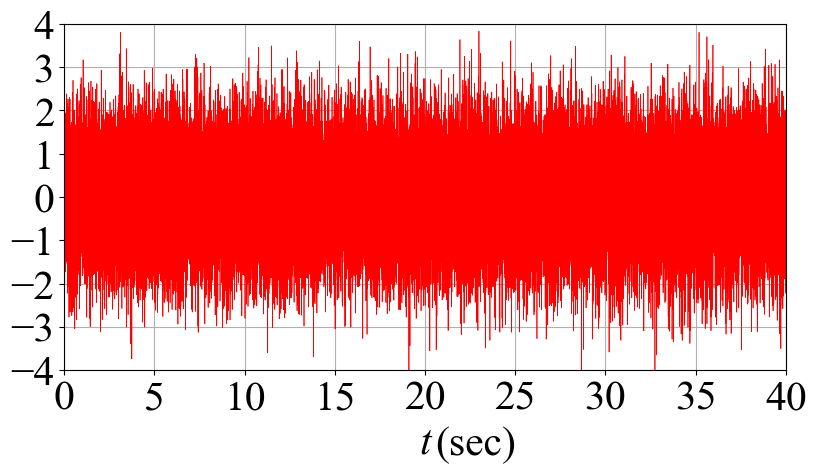

In [64]:
# 白噪声
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置字体为新罗马
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# 生成白噪声序列
np.random.seed(0)  # 设置随机种子，以保证结果可重复
duration = 40  # 持续时间为40秒
sample_rate = 1000  # 采样率为1000 Hz
num_samples = duration * sample_rate  # 总采样点数
white_noise = np.random.randn(num_samples)

# 绘制白噪声图像
time = np.linspace(0, duration, num_samples)  # 时间轴
plt.figure(figsize=(8, 4))  # 设置图形大小
plt.plot(time, white_noise, color='r', linewidth = 0.5)
plt.ylabel('Amplitude', fontsize=14)
# plt.title('White Noise', fontsize=35, fontstyle='italic')
plt.grid(True)
plt.tight_layout()

# 移除Y轴标题
plt.gca().set_ylabel('')

# 设置横坐标的标题和刻度标签
plt.xlabel('t', fontsize=30, fontstyle='italic')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
# plt.gca().xaxis.set_label_coords(0.5, -0.15)  # 调整横坐标标题的位置
plt.xlim(0,40)
plt.ylim(-4, 4)
# 添加横坐标标题的单位
plt.text(0.57, - 0.245, '(sec)', fontsize=30, fontstyle='normal', ha='center', transform=plt.gca().transAxes)

# 保存图像并显示
plt.savefig('white_noise.png', dpi=600, bbox_inches='tight', transparent=True)  # 保存为高分辨率图像
plt.show()

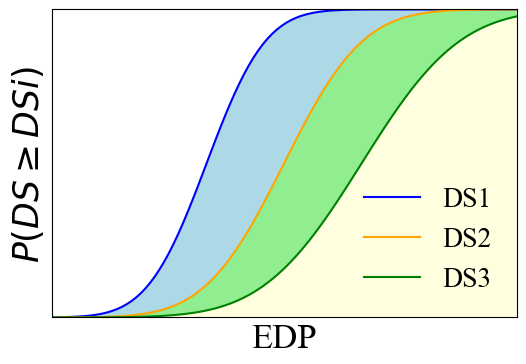

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from matplotlib import rcParams

# 设置字体为新罗马
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
# 生成示例数据
x = np.linspace(-3, 3, 100)  # 正态分布的横坐标范围
ds1 = norm.cdf(x, loc=-1, scale=0.6)  # DS1的累积分布
ds2 = norm.cdf(x, loc=0, scale=0.8)  # DS2的累积分布
ds3 = norm.cdf(x, loc=1, scale=1)  # DS3的累积分布

# 创建图形对象
fig, ax = plt.subplots(figsize=(6, 4))

# 绘制累积分布曲线
ax.plot(x, ds1, color='blue', label='DS1')
ax.plot(x, ds2, color='orange', label='DS2')
ax.plot(x, ds3, color='green', label='DS3')

# 填充曲线之间的区域
ax.fill_between(x, ds1, ds2, where=(ds1 >= ds2), facecolor='lightblue', interpolate=True)
ax.fill_between(x, ds2, ds3, where=(ds2 >= ds3), facecolor='lightgreen', interpolate=True)
ax.fill_between(x, ds3, 0, facecolor='lightyellow', interpolate=True)
# 设置标题和标签
# ax.set_title('Cumulative Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('EDP', fontsize=25)
ax.set_ylabel(r'$P(DS \geq DSi)$', fontsize=25)

# 隐藏坐标刻度
ax.set_xticks([])
ax.set_yticks([])

# 设置纵坐标范围为[0, 1]
ax.set_ylim([0, 1])
ax.set_xlim([-3,3])

# 显示图例
ax.legend(frameon = False, fontsize = 20)

plt.savefig('ds.png', dpi=600, bbox_inches='tight', transparent=True)  # 保存为高分辨率图像

# 显示图形
plt.show()


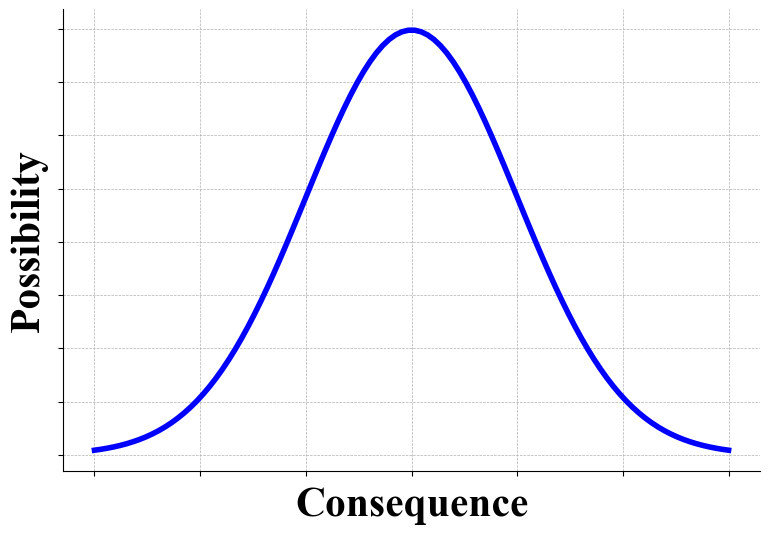

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import rcParams

# 设置使用的字体为Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# 生成示例数据
x = np.linspace(-3, 3, 100)  # 正态分布的横坐标范围
y = norm.pdf(x, loc=0, scale=1)  # 正态分布的概率密度函数

# 创建图形对象
fig, ax = plt.subplots(figsize=(9, 6))

# 绘制正态分布曲线
ax.plot(x, y, color='blue', linewidth = 4)

# 设置标题和标签
# ax.set_title('Normal Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Consequence', fontsize=30, fontweight='bold')
ax.set_ylabel('Possibility', fontsize=30, fontweight='bold')

# 隐藏上轴和右轴
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 隐藏左轴和下轴的刻度
ax.set_yticklabels([])
ax.set_xticklabels([])

# 显示网格线
ax.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('com.png', dpi=600, bbox_inches='tight', transparent=True)  # 保存为高分辨率图像


# 显示图形
plt.show()
